<a href="https://colab.research.google.com/github/JuliaHdzQ/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Lab04_Grupo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 4**


> GRUPO A03



>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas, Pablo Mendieta Ruiz

> ### Ejercicio 1 (Regresión Lineal)

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Especicicamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/wine_alcohol.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
data_wine = pd.read_csv(ruta_archivo_drive, sep = ';')

# Mostramos el Dataframe, verificando que los datos se han cargado correctamente
data_wine.head()

Mounted at /content/drive


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


> #### Preprocesamiento de datos

> ##### Estudio del dominio

En esta práctica vamos a trabajar con una base de datos que contiene información sobre todos los vinos producidos en los últimos años.

A partir de ella podremos extraer información útil sobre los vinos y sus características, especialmente analizando el porcentaje de alcohol que estos contienen en función de sus propiedades.

Vamos a hacer un análisis del dominio, para ver que nos dice cada una de las propiedades (atributos) de los vinos, que contiene nuestra base de datos:


1. Fixed acidity: conjunto de ácidos naturales del vino

2. Volatile acidity: cantidad de ácido acético del vino

3. Citric acid: ácido menos común en el vino.

4. Residual sugar: azúcar tras el proceso de elaboración del vino

5. Chlorides: sales minerales en el vino

6. Free sulfur dioxide: conservante adicionado durante la elaboración del vino.

7. Total sulfur dioxide: conservante adicionado durante la elaboración del vino.

8. Density: peso específico del vino

9. Ph: medida de la ácidez del vino

10. Sulphates: empleados para detener la fermentación en un momento específico.

11. Quality: calidad del vino

2. Wine type: tipo de vino

13. Alcohol: porcentaje de alcohol en el vino

> ##### Preparación de los datos


In [2]:
data_wine.shape

(6497, 14)

In [3]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


No existen valores nulos, o Nan en nuestra base de datos. Además todas nuestras variables son numéricas, a excepción de dos categóricas, el tipo de vino, y la calidad del mismo.

Vamos a representar gráficamente la variable a analizar alcohol.

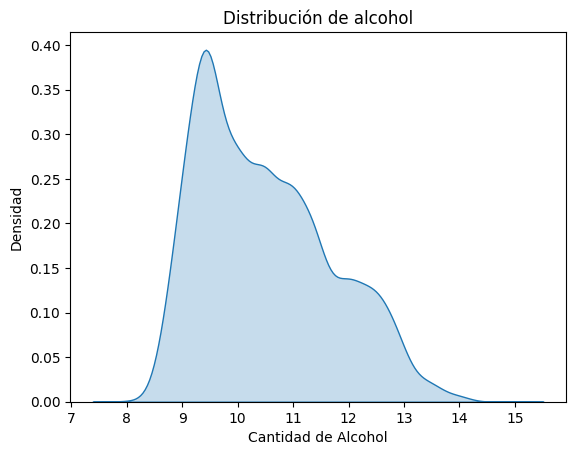

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar histograma de la variable diagnosis
sns.kdeplot(data_wine['alcohol'], fill=True)
plt.title('Distribución de alcohol')
plt.xlabel('Cantidad de Alcohol')
plt.ylabel('Densidad')
plt.show()
plt.show()

Podemos observar como la gran mayoría de valores están entre 8 y 11,  y a partir de ese punto, van diminuyendo, siendo muy pocos vinos lo que superan los 12 cc de alcohol.

Vamos a ver si alguna de las varibles de nuestra base de datos presenta **Outliers**, o valores fuera de rango, y de ser así analizaremos que hacer con ellos:

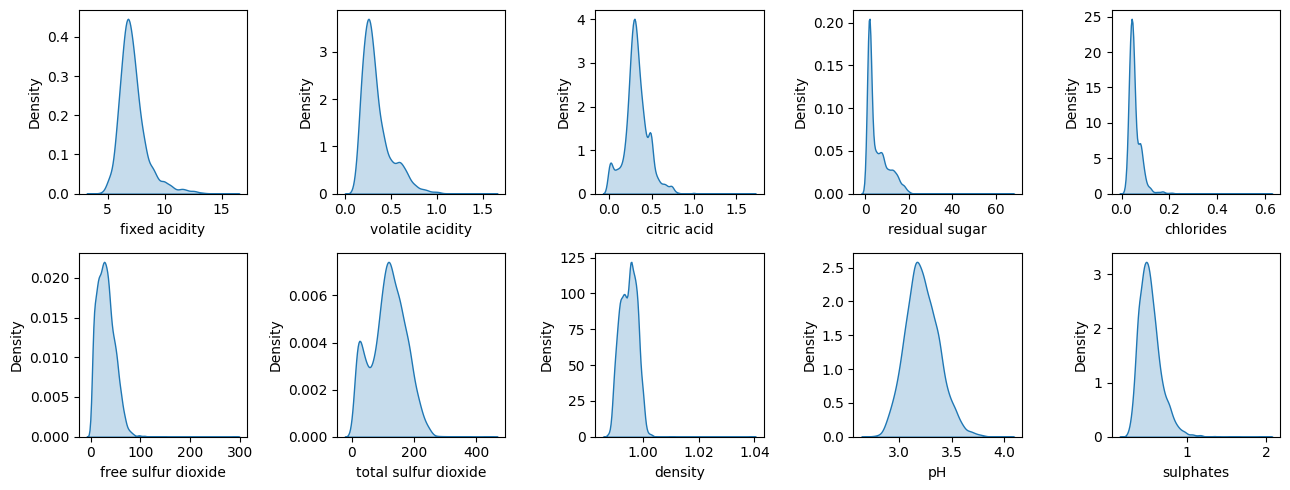

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la figura con subplots para los 10 diagramas de densidad
fig, axes = plt.subplots(2, 5, figsize=(13, 5))
axes = axes.flatten()

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
             'sulphates']

# Creamos los gráficos de densidad para cada variable
for i, variable in enumerate(variables):
    sns.kdeplot(data_wine[variable], ax=axes[i], fill=True)

plt.tight_layout()
plt.show()

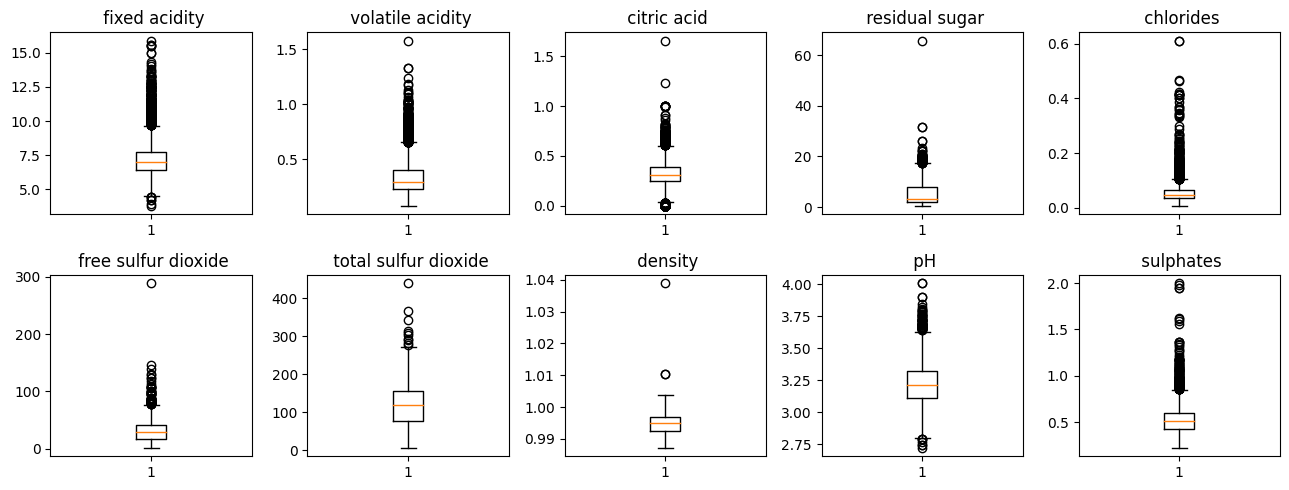

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la figura con subplots para los 10 diagramas de densidad
fig, axes = plt.subplots(2, 5, figsize=(13, 5))
axes = axes.flatten()

# Creamos los gráficos de densidad para cada variable
for i, variable in enumerate(variables):
  axes[i].boxplot(data_wine[variable])
  axes[i].set_title(f' {variable}')

plt.tight_layout()
plt.show()

Una vez vistas, tanto las distribuciones como las boxplot o cajas de bigotes, de nuestras variables continuas, podemos ver que la gran mayoría de ellas presentan muchos valores fuera de rango, sin embargo no parece que la causa de esto sea errores de medición o de entrada de datos, sino que se distribuyen así. Por eso consideramos que es mejor mantenerlos, y seguir trabajando de ellos, ya que sino estaríamos descartando una gran cantidad de información, muy probablemente valiosa.

La única variable que puede dar lugar a dudas, pues son muy puntales y alejados los outliers, es la densidad, por lo que en este caso si que los eliminaremos.

Para ellos obtenemos los quartiles y el IQR, y eliminaremos los valores fuera del rango:

In [7]:
import pandas as pd

primer_cuartil = data_wine['density'].quantile(0.25)
tercer_cuartil = data_wine['density'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = tercer_cuartil - primer_cuartil

# Define los límites para identificar outliers
limite_inferior = primer_cuartil - 1.5 * IQR
limite_superior = tercer_cuartil + 1.5 * IQR

# Filtra los datos para eliminar outliers
data_wine = data_wine[(data_wine['density'] > limite_inferior) &
                               (data_wine['density'] < limite_superior)]

data_wine.shape

(6494, 14)

El siguiente paso va a ser eliminar la primera columna de nuestro dataset, que es id, ya que no tiene demasiada utilidad, pues solo nos esta indicando el numero de registro en el que nos encontramos:

In [8]:
data_wine = data_wine.drop(columns=['id'], errors='ignore')

Una vez lista nuestra base de datos, vamos a mostrar la matriz de correlaciones, para ver cuales son las variables mas favorables a la hora de intentar predecir con ellas, los valores de alcohol en el vino, por medio de una regresión:

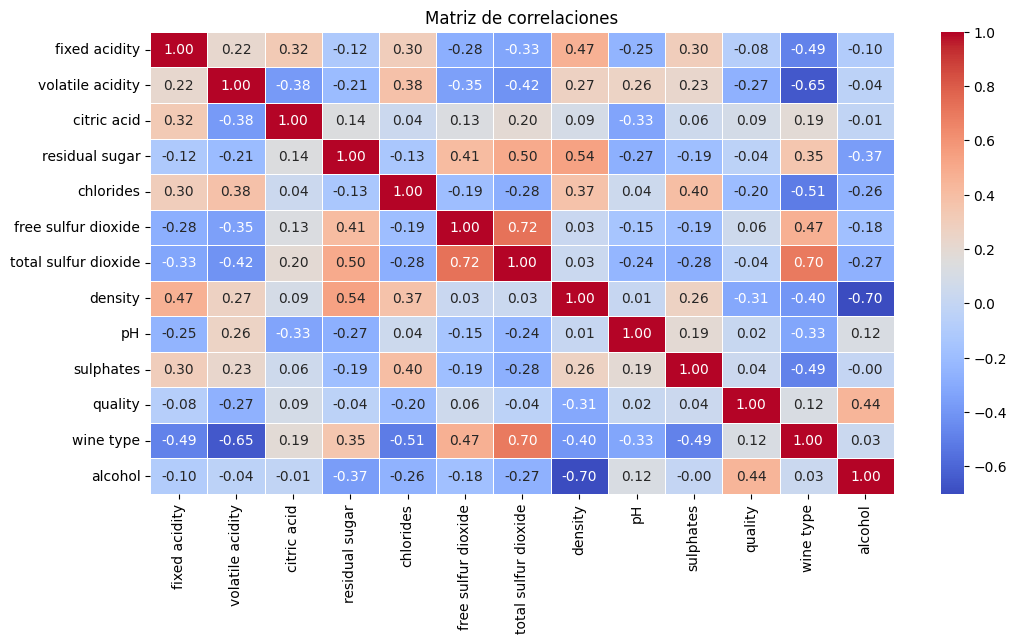

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = data_wine.columns

# matriz de correlaciones
correlation_matrix = data_wine[cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

Utilizamos este gráfico, para entender las correlaciones del resto de variables, con la variable dependiente, es decir la variable que queremos predecir, que será alcohol.

Como se observa en el mapa de correlaciones, solo hay una variable que tienen una correlación relativamente alta con alcohol, que es la densidad.

Las siguientes variables que mas correlación tienen con la independiente son calidad, y azucar residual, pero ya con valores inferioires al 0.5.

Los datos empíricos empleados para la elección de estas variables, son los valores de correlación entre ellas, y la variable dependiente.

> #### Modelo de Regresión Lineal

En este apartado, vamos a crear un modelo de regresión lineal, tomando como variable dependiente el alcohol, que será la variable que queremos analizar y predecir, y como independiente tomaremos la densidad del vino, ya que es la que mayor correlación guarda con la cantidad de alcohol.



In [10]:
import math
# Media y Varianza de X (variable independiente)
media_X = (data_wine['density']).mean()
suma = 0
for i in data_wine['density']:
    suma += (i - media_X)**2
varianza_X = suma / len(data_wine['density'])

# Media y varianza de Y, variable independiente
media_Y = np.mean(data_wine['alcohol'])
suma2 = 0
for i in data_wine['alcohol']:
    suma2 += (i - media_Y)**2
varianza_Y = suma2 / len(data_wine['alcohol'])

# COVARIANZA
suma_cov = 0
for x, y in zip(data_wine['alcohol'], data_wine['density']):
    suma_cov += (x - media_Y) * (y - media_X)

covarianza_manual = suma_cov / len(data_wine['alcohol'])

# Obtenemos la correlación, que debe coincidir con la obtenida en la matriz de correlaciones
correlacion = covarianza_manual / (math.sqrt(varianza_X) * math.sqrt(varianza_Y))
print("La correlación entre 'alcohol' y 'density' (calculada manualmente) es:", correlacion)

La correlación entre 'alcohol' y 'density' (calculada manualmente) es: -0.7019126280321483


Una vez tenemos estos valores ya calculados, podemos sacar el valor del intercepto B0 y el valor de la pendiente B1, y con ellos construir nuestro modelo de regresión lineal:



In [11]:
beta_1 = covarianza_manual / varianza_X
beta_0 = media_Y - beta_1*media_X
print("La pendiente de nuestro modelo (calculada manualmente) es:", beta_1)
print("El intercepto de nuestro modelo (calculada manualmente) es:", beta_0)

La pendiente de nuestro modelo (calculada manualmente) es: -285.1151929982196
El intercepto de nuestro modelo (calculada manualmente) es: 294.0919441993761


MODELO REGRESIÓN LINEAL --> CALCULO ANALÍTICO

In [12]:
# Datos para trazar la línea de regresión
x_values = data_wine['density']  # Variable predictora (eje x)
y_values = data_wine['alcohol']  # Variable de respuesta (eje y)

# Calculamos los valores y_prediccion utilizando los coeficientes anteriores
y_prediccion = beta_0 + beta_1 * x_values

MODELO REGRESIÓN LINEAL --> FUNCIÓN PYTHON

In [13]:
from sklearn.linear_model import LinearRegression

X = data_wine[['density']]  # Variable independiente (X)
y = data_wine['alcohol']    # Variable dependiente (y)

# Inicializa y ajusta el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcula los valores predichos y_prediccion
y_prediccion_dos = modelo.predict(X)

print("\nEl coeficiente de regresión es:", modelo.coef_)



El coeficiente de regresión es: [-285.115193]


**Representación gráfica** de ambas regresiones:

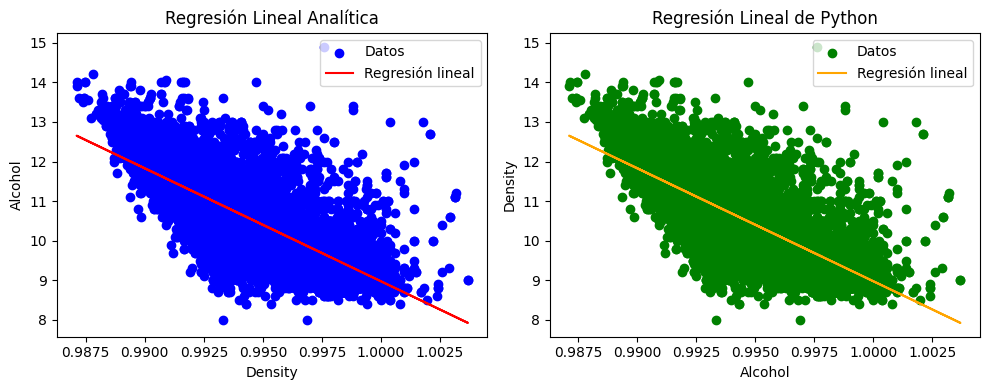

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primer subgráfico: Regresión lineal analítica
axes[0].scatter(x_values, y_values, color='blue', label='Datos')
axes[0].plot(x_values, y_prediccion, color='red', label='Regresión lineal')
axes[0].set_xlabel('Density')
axes[0].set_ylabel('Alcohol')
axes[0].set_title('Regresión Lineal Analítica')
axes[0].legend()

# Segundo subgráfico: Regresión lineal con 'alcohol' en el eje x y 'density' en el eje y
axes[1].scatter(X, y, color='green', label='Datos')
axes[1].plot(X, y_prediccion_dos, color='orange', label='Regresión lineal')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Density')
axes[1].set_title('Regresión Lineal de Python')
axes[1].legend()

plt.tight_layout()
plt.show()

Cálculo del **Residuo ordinario**

Para ello, tomaremos las diferencias entre los valores reales de nuestros datos, yi, y los valores predichos por nuestro modelo de regresion lineal ^yi.


In [15]:
SCT = 0
for y in data_wine['alcohol']:
    SCT += (y - media_Y) **2

SCE = 0
for y in y_prediccion:
    SCE += (y - media_Y) ** 2

SCR = 0
for x, y in zip (y_prediccion,data_wine['alcohol']):
    SCR += (y - x) ** 2

# Imprime los resultados
print("Suma de Cuadrados Total (SCT):", SCT)
print("Suma de Cuadrados Explicada (SCE):", SCE)
print("Suma de Cuadrados Residual (SCR):", SCR)

Suma de Cuadrados Total (SCT): 9233.773453986654
Suma de Cuadrados Explicada (SCE): 4549.307854475646
Suma de Cuadrados Residual (SCR): 4684.465599510944


Podemos mencionar que los valores de los errores son valores bastante altos, cosa que ya podíamos intuir al ver el valor de la correlación entre densidad, y nuestra variable dependiente alcohol, y también al graficar la regresión lineal, pues muchos valores quedaban muy lejanos de la recta de regresión.


A continuación, vamos a calcular como métrica R^2, el coeficiente de determinación. Este valor, nos dice la porción de varianza de Y, explicada por nuesta variable independiente x, en este caso densidad. Este valor oscila entre 0-1, cuando mas cercano a 1, mayor bondad existirá en nuestro ajuste:

In [16]:
coef = SCE / SCT
print("Coeficiente de determinación (R^2):", coef)

Coeficiente de determinación (R^2): 0.49268133739099873


Con este coeficiente, podemos concluir que tan solo el 50% de la variabilidad de la variable alcohol, puede ser explicada por nuestro modelo de regresión.

Con estos resultados, es evidente considerar incluir algunas variables más, para conseguir explicar un mayor porcentaje de la variabilidad de alcohol, y así conseguir un mejor modelo predictivo.

Así introducimos el siguiente apartado, en el que añadiremos más variables independientes, llevando a cabo una regresión lineal múltiple.

> ## Ejercicio 2 (Regresión Lineal Múltiple)

Creamos un conjunto de test, y un conjunto de entrenamiento, para después verificar la precisión del modelo, con datos que no ha visto antes:

In [17]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(data_wine.drop(columns=['alcohol']), data_wine['alcohol'], test_size=0.2, random_state=42)

# Imprime el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(x_train))
print("Tamaño del conjunto de prueba:", len(x_test))

Tamaño del conjunto de entrenamiento: 5195
Tamaño del conjunto de prueba: 1299



> #### Modelos de Regresión Múltiple

**MODELO REGRESIÓN MÚLTIPLE** : 4 variables predictoras (elección aleatoria)

In [18]:
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

columnas_validas = [col for col in data_wine.columns if col != 'alcohol']
columnas = random.sample(columnas_validas, 4)
print(columnas)

X = x_train[columnas]  # Variable independiente (X)
y = y_train   # Variable dependiente (y)

# Inicializa y ajusta el modelo de regresión lineal
modelo_rand_4 = LinearRegression()
modelo_rand_4.fit(X, y)

# Calcula los valores predichos y_prediccion
y_prediccion = modelo_rand_4.predict(x_train[columnas])

print("\nLos coeficientes del modelo son:", modelo_rand_4.coef_)

mse = mean_squared_error(y_train, y_prediccion)
print("\nError cuadrático medio en datos de entrenamiento:", mse)

['free sulfur dioxide', 'fixed acidity', 'pH', 'density']

Los coeficientes del modelo son: [-1.82136606e-03  3.22432420e-01  1.57940034e+00 -3.51388765e+02]

Error cuadrático medio en datos de entrenamiento: 0.5581766673327577


Verificamos la precisión del modelo con datos nunca vistos:

In [19]:
# Calcula los valores predichos y_prediccion
y_prediccion_test = modelo_rand_4.predict(x_test[columnas])

mse_1 = mean_squared_error(y_test, y_prediccion_test)
print("Error cuadrático medio en datos de test:", mse_1)

Error cuadrático medio en datos de test: 0.5556909692613987


**MODELO REGRESIÓN MÚLTIPLE** : 4 variables predictoras (mayor correlación)

In [20]:
columnas = ['density' , 'residual sugar' , 'quality' , 'total sulfur dioxide']

X = x_train[columnas]  # Variable independiente (X)
y = y_train   # Variable dependiente (y)

# Inicializa y ajusta el modelo de regresión lineal
modelo_b4 = LinearRegression()
modelo_b4.fit(X, y)

# Calcula los valores predichos y_prediccion
y_prediccion = modelo_b4.predict(x_train[columnas])

print(modelo_b4.coef_)

mse = mean_squared_error(y_train, y_prediccion)
print("\nError cuadrático medio, con datos de entrenamiento:", mse)

[-2.98909456e+02  5.22020022e-02  2.85649667e-01 -7.25773245e-03]

Error cuadrático medio, con datos de entrenamiento: 0.5230917044341115


Evaluamos ahora el modelo, con nuestro conjunto de test:

In [21]:
# Calcula los valores predichos y_prediccion
y_prediccion_test = modelo_b4.predict(x_test[columnas])

mse_2 = mean_squared_error(y_test, y_prediccion_test)
print("Error cuadrático medio con datos de test:", mse_2)

Error cuadrático medio con datos de test: 0.5788076054677237


**MODELO REGRESIÓN MÚLTIPLE** : 8 variables predictoras (elegidas)

In [22]:
columnas = ['total sulfur dioxide', 'wine type', 'quality', 'chlorides', 'citric acid', 'free sulfur dioxide', 'residual sugar', 'density']

X = x_train[columnas]  # Variable independiente (X)
y = y_train   # Variable dependiente (y)

# Inicializa y ajusta el modelo de regresión lineal
modelo_rand8 = LinearRegression()
modelo_rand8.fit(X, y)

# Calcula los valores predichos y_prediccion
y_prediccion = modelo_rand8.predict(x_train[columnas])

print(modelo_rand8.coef_)

mse = mean_squared_error(y_train, y_prediccion)
print("Error cuadrático medio:", mse)

[-2.04577906e-04 -1.81465304e+00  2.04377291e-01 -3.20330794e+00
  1.31013896e+00 -6.30907601e-03  1.27983212e-01 -4.73000567e+02]
Error cuadrático medio: 0.39149927100928184


In [23]:
print(columnas)
# Calcula los valores predichos y_prediccion
y_prediccion_test = modelo_rand8.predict(x_test[columnas])

mse = mean_squared_error(y_test, y_prediccion_test)
print("Error cuadrático medio:", mse)

['total sulfur dioxide', 'wine type', 'quality', 'chlorides', 'citric acid', 'free sulfur dioxide', 'residual sugar', 'density']
Error cuadrático medio: 0.42586747443847717



> #### Modelo aprendizaje iterativo

**MODELO APRENDIZAJE ITERATIVO**

Una vez evaluados varios modelos, podemos afirmar que cuanto mayor sea el número de variables predictoras, por regla general mejor va a ser nuestro modelo.

Es lógico pensar que cuantas más variables tomemos, menos información se queda fuera, sin embargo no es fácil saber cuales son las mejores variables.

Por ello, hemos elaborado un proceso iterativo, donde se prueban diferentes combinaciones de 6 variables independientes, hasta encontrar la combinación de las 6 variables que menor error cuadratico medio generan:

In [24]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

columnas = [col for col in data_wine.columns if col != 'alcohol']

# Generar todas las combinaciones posibles de 4 columnas
todas_combinaciones = combinations(columnas, 6)

# Inicializar las variables para almacenar la mejor combinación y su error
mejor_combinacion = None
mejor_error = float('inf')

# Iterar sobre todas las combinaciones
for combinacion in todas_combinaciones:
    # Seleccionar las características correspondientes a la combinación actual
    X = x_train[list(combinacion)]
    y = y_train

    # Inicializar y ajustar el modelo de regresión lineal
    modelo_iter = LinearRegression()
    modelo_iter.fit(X, y)

    # Realizar predicciones en los datos de entrenamiento
    y_pred = modelo_iter.predict(X)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Actualizar la mejor combinación si encontramos un error menor
    if mse < mejor_error:
        mejor_error = mse
        mejor_combinacion = combinacion

# Imprimir la mejor combinación y su error
print("Mejor combinación de características:", mejor_combinacion)
print("Error cuadrático medio mínimo:", mejor_error)

Mejor combinación de características: ('fixed acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'wine type')
Error cuadrático medio mínimo: 0.21959198343152497


> #### MODELO FINAL

Una vez tenemos la mejor combinación de variables, las empleamos en nuestro modelo final, el cual entrenamos, y del que obtenemos el error para valores nunca vistos.

A partir de este modelo final, analizaremos los intervalos de confianza

In [25]:
columnas = list(mejor_combinacion)
print(columnas)

X = x_train[columnas]  # Variable independiente (X)
y = y_train   # Variable dependiente (y)

# Inicializa y ajusta el modelo de regresión lineal
modelo_final = LinearRegression()
modelo_final.fit(X, y)

# Calcula los valores predichos y_prediccion
y_prediccion = modelo_final.predict(x_train[columnas])

print(modelo_final.coef_)

mse = mean_squared_error(y_train, y_prediccion)
print("Error cuadrático medio:", mse)

['fixed acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'wine type']
[ 5.76984141e-01  2.41086333e-01 -7.08676986e+02  2.67355021e+00
  1.05035339e+00 -1.42143541e+00]
Error cuadrático medio: 0.21959198343152497


In [26]:
# Calcula los valores predichos y_prediccion
y_prediccion_test = modelo_final.predict(x_test[columnas])

mse = mean_squared_error(y_test, y_prediccion_test)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.19962389429985392


*ERRORES Y MÉTRICAS DEL MODELO FINAL*

In [27]:
media_Y = np.mean(y_test)

SCT = 0
for y in y_test:
    SCT += (y - media_Y) **2

SCE = 0
for y in y_prediccion_test:
    SCE += (y - media_Y) ** 2

SCR = 0
for x, y in zip (y_prediccion_test,y_test):
    SCR += (y - x) ** 2

# Imprime los resultados
print("\nSuma de Cuadrados Total (SCT):", SCT)
print("Suma de Cuadrados Explicada (SCE):", SCE)
print("Suma de Cuadrados Residual (SCR):", SCR)

# Finalmente calculamos el coeficiente de determinación:
coef = SCE / SCT
print("\nCoeficiente de determinación (R^2):", coef)


Suma de Cuadrados Total (SCT): 1891.1882441536247
Suma de Cuadrados Explicada (SCE): 1576.4193418684708
Suma de Cuadrados Residual (SCR): 259.31143869551005

Coeficiente de determinación (R^2): 0.8335602480301878


> #### Intervalos de confianza

Vamos a calcular los intervalos de confianza para cada uno de los coeficientes de regresion, con un intervalo de confianza del 75 % con G grados de libertad.

G será la diferencia entre el número de individuos de la población y el número de parámetros a estimar.

In [28]:
confianza = 95/100

G = len(x_test) - len(modelo_final.coef_)
print('El número de grados de libertad, G será:', G)

alpha = 1 - confianza
print(round(alpha,4))

El número de grados de libertad, G será: 1293
0.05


Calculamos el valor de t(alpha,G) utilizando la tabla t-student:

In [29]:
from scipy.stats import t

valor_critico = t.ppf(alpha/2, df=G)
print(abs(valor_critico))

1.961800377167034


Calculamos la varianza de cada uno de nuestros coeficientes:

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error

X = x_train[columnas].values
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculamos la matriz (X^T X)^{-1}
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Calculamos la varianza de cada coeficiente
varianza_coefs = mse * np.diag(XtX_inv)
print("Varianza de los coeficientes:", varianza_coefs)


Varianza de los coeficientes: [1.94582239e+01 5.64140366e-05 6.94282964e-06 2.02642517e+01
 2.52985382e-03 2.35078691e-03 5.89461817e-04]


Finalmente, calculamos los intervalos de confianza:

In [31]:
def calcular_intervalos_confianza(coeficientes, varianzas, t_value):
    intervalos_confianza = []
    for coef, var in zip(coeficientes, varianzas):
        margen_error = t_value * np.sqrt(var)
        intervalo_inferior = coef - margen_error
        intervalo_superior = coef + margen_error
        intervalos_confianza.append((intervalo_inferior, intervalo_superior))
    return intervalos_confianza


coeficientes = modelo_final.coef_
varianzas = varianza_coefs
t_value = valor_critico
intervalos = calcular_intervalos_confianza(coeficientes, varianzas, t_value)

# Imprimir los intervalos de confianza
for i, intervalo in enumerate(intervalos):
    print(f"Intervalo de confianza para el coeficiente {i+1}: {intervalo}")


Intervalo de confianza para el coeficiente 1: (9.230775337037317, -8.076807055135513)
Intervalo de confianza para el coeficiente 2: (0.25582127402630234, 0.22635139198930818)
Intervalo de confianza para el coeficiente 3: (-708.6718165859379, -708.6821549795702)
Intervalo de confianza para el coeficiente 4: (11.504757915207083, -6.157657494986246)
Intervalo de confianza para el coeficiente 5: (1.1490273446488986, 0.951679438251789)
Intervalo de confianza para el coeficiente 6: (-1.3263176897235014, -1.516553136028794)


Observando estos resultados, y sobre la hipotesis nula H0: B0 = B1 = B2 = .. = 0, podemos decir que los coeficientes 1 y 4 (fixeda acidity y pH), contienen en su intervalo el 0, por lo que es probable que estos valores no sean significativamente distintos de cero, y por tanto no hay evidencia suficiente para afirmar que el efecto de esa variable en la variable dependiente es distinto de cero.

El resto de intervalos son mas pequeños, lo que supone una mayor precisión en la estimación de dichos coeficientes. Además no contienen el cero, por lo que con una alta probabilidad el efecto de estas variables sobre la variable independiente existirá siendo distinta de cero.



> ## Ejercicio 3

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).
Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las siguientes acciones:

1.   Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de regresión (0.5 puntos).

2.  Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el atributo objetivo (nivel de alcohol) (1 punto). Es necesario justificar la elección de los atributos mediante la utilización de datos empíricos.

3.  Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables seleccionadas en el punto anterior (1 punto).

4.  Calcular el error en el modelo obtenidos en el punto anterior (0.5 puntos).

Importamos de nuevo la base de datos inicial, sin ningun preprocesamiento:

In [32]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Especicicamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/wine_alcohol.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
wine_alcohol = pd.read_csv(ruta_archivo_drive, sep = ';')

# Mostramos el Dataframe, verificando que los datos se han cargado correctamente
wine_alcohol.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4



> #### Análisis y Preparación de los Datos

Verificamos que no haya valores nulos en nuestros datos

In [33]:
# Visualizar información básica de los datos
print(wine_alcohol.info())
# Verificar la existencia de valores nulos
print(wine_alcohol.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB
None
id                 

Vamos a hacer un pequeño análisis de la variable quality, ya que es la variable que queremos analizar especialmente, con la intención de verificar la validez de la clasificación en cuanto a cualidad, realizada por la empresa evaluadora.

Analizamos dicha variable, en cuanto a (distribución, valores atípicos) y su relación con la variable objetivo('alcohol')

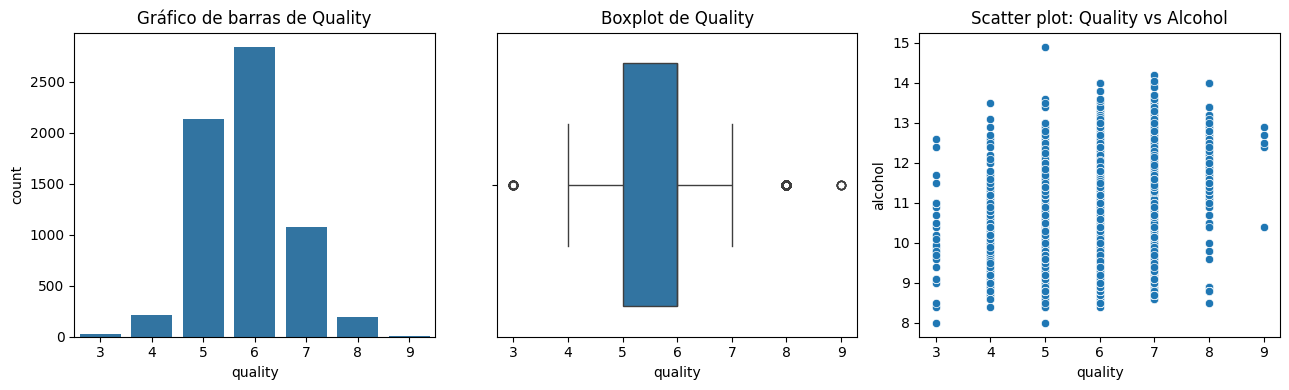

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Graficamos distintas variantes de esta variable, para analizar su forma, y su comportamiento
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

sns.countplot(x='quality', data=wine_alcohol, ax=axes[0])
axes[0].set_title('Gráfico de barras de Quality')

sns.boxplot(x=wine_alcohol['quality'], ax=axes[1])
axes[1].set_title('Boxplot de Quality')

sns.scatterplot(x='quality', y='alcohol', data=wine_alcohol, ax=axes[2])
axes[2].set_title('Scatter plot: Quality vs Alcohol')

plt.tight_layout()
plt.show()



En primer lugar vemos que no existen outliers, sino que estos pertencen a las categorias menos comunes, que son la 3, la 8 y la 9.

Vemos que las categorías mas recurrentes son la 5 y la 6, que continen vinos con cantidades de alcohol muy variadas.

**ELIMINACIÓN DE VARIABLES INNCESARIAS**

Vamos a eliminar la variable id, ya que no nos aportará nada a la hora de llevar a cabo una clusterización.

In [35]:
wine_alcohol = wine_alcohol.drop(columns=['id'], errors='ignore')

**MATRIZ DE CORRELACIONES**

Continuamos con la correlación entre las variables:

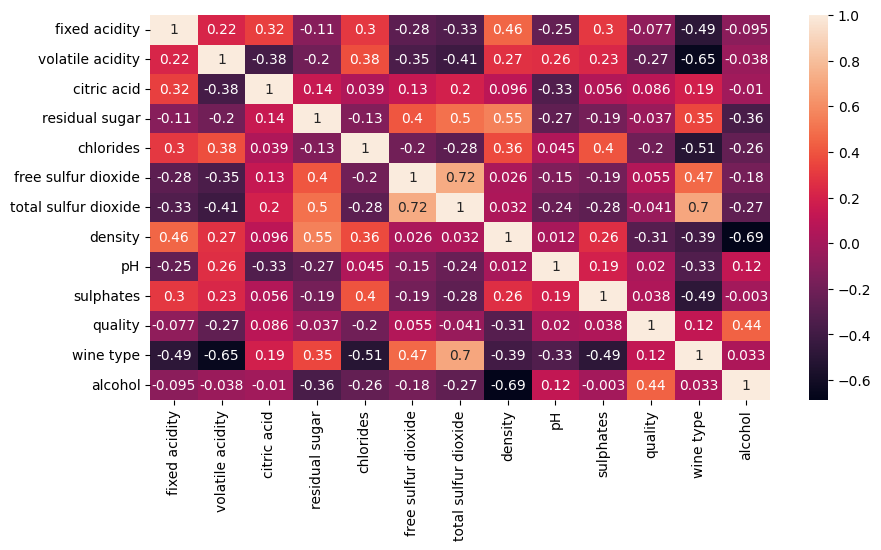

In [36]:
# Matriz de correlación
correlation_matrix = wine_alcohol.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Analizando la matriz de correlaciones, podemos identificar aquellas variables con alta correlación postiva, es decir cercana a 1, lo que significa que tienden a aumentar o disminuir juntas.
Esto implica que en un análisis cluster, esas varibales se agrupen en el mismo cluster, ya que tienen una relación muy similar.


   - **Total sulfur dioxide y Wine type**: Existe una correlación positiva bastante alta (0.7) entre el el dióxido de azufre total y el tipo de vino, lo que sugiere el tipo de vino, podría coincidir con una determinada cantidad de azufre total. Esto implica que ambos puedan compartir cluster.

   - **Free sulfur dioxide y Total sulfur dioxide**: Como era de esperar, hay una correlación muy alta (0.72) entre el dióxido de azufre libre y total, indicando que los niveles totales están fuertemente influenciados por la cantidad libre presente. Esto implica, que es muy probable que ambas características queden agrupadas en un mismo cluster.

   - **Density y Alcohol**: La correlación entre **density y alcohol** es bastante alta, lo cual es importante porque a medida que es mayor la densidad del vino, tambien tiene mas cantidad de alcohol. De la misma manera que en el caso anterior, sería logico pensar que ambas variables aparezcan en un mismo cluster.

   - **Variables con Baja Correlación con el Alcohol**: Muchas variables, como **pH**, **chlorides**, **residual sugar**, y **fixed acidity** muestran correlaciones muy bajas con el alcohol (menores a 0.15 en valor absoluto). Esto nos hace pensar, que lo más probable es que estas variables no comportan cluster, con la variable alcohol.





> #### Modelos de Cluster

In [37]:
# Importar las bibliotecas necesarias
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Cargar el conjunto de datos 'wine' desde sklearn
data = wine_alcohol

# Estandarizamos los valores
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Configurar el modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Convertir los centroides de nuevo a la escala original (desescalarlos)
centroids_original_scale = scaler.inverse_transform(centroids)

# Crear un DataFrame para mostrar los centroides
centroids_df = pd.DataFrame(centroids_original_scale, columns=data.columns)
print("Centroides de los 3 clusters:")
print(centroids_df)

inertia = kmeans.inertia_
print(f"\nInercia (Suma de los errores al cuadrado dentro de los clusters) para k=7: {inertia}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides de los 3 clusters:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.994267          0.281730     0.364007       12.291833   0.050870   
1       6.674327          0.282378     0.327673        3.577018   0.035494   
2       6.491563          0.245590     0.304048        4.298292   0.045622   
3       8.206667          0.523500     0.496667        3.106667   0.376000   
4       7.381120          0.613237     0.143071        2.431172   0.081158   
5       7.214609          0.292837     0.330829        3.582705   0.051026   
6       9.853744          0.401231     0.459334        2.692679   0.085220   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            47.188333            172.050000  0.997416  3.138287   0.489573   
1            30.252364            111.994182  0.990963  3.189484   0.484378   
2            38.292443            148.467391  0.993763  3.339400   0.533582   
3            18.433333       

Hemos probado en primer lugar a realizar el cluster, para k = 7, es decir para 7 clusters finales. Podriamos probar con más valores de k e ir evaluando las inercias, pero no es la mejor forma de llevar a cabo la elección.

A la hora de elegir k, el número de clusters, se busca minimizar las conexiones es decir, maximizar las distancia entre clústeres y maximizar las conexiones
o minimizar las distancias dentro del clúster.

Para ello, utilizaremos método del codo, una técnica utilizada para encontrar el número óptimo de clusters en un modelo de agrupamiento (generalmente KMeans). Utiliza la relación entre el número de clusters y la inercia (la suma de las distancias cuadradas entre los puntos de datos y sus centroides más cercanos).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

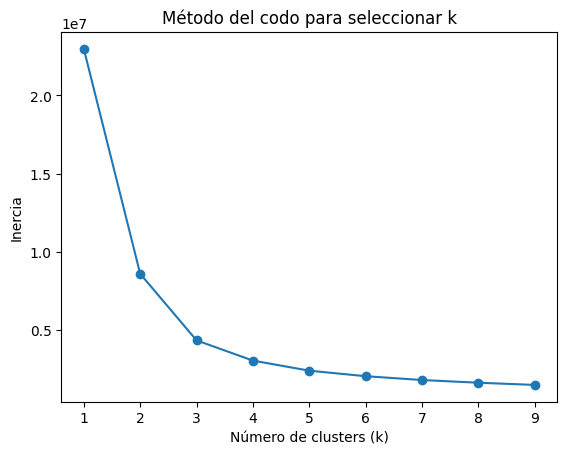

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplazar con tus datos)
X = wine_alcohol

# Lista para almacenar los valores de la inercia
inercia = []

# Rango de valores de k que deseas probar
valores_k = range(1,10)

# Ejecutar KMeans para cada valor de k y guardar la inercia
for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Graficar la inercia en función de los valores de k
plt.plot(valores_k, inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para seleccionar k')
plt.show()


Visualizando el grafico del codo, vamos a considerara como número óptimo de clusters **k = 3**:

In [39]:
# Importar las bibliotecas necesarias
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Cargar el conjunto de datos 'wine' desde sklearn
data = wine_alcohol

# Estandarizamos los valores
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Configurar el modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Convertir los centroides de nuevo a la escala original (desescalarlos)
centroids_original_scale = scaler.inverse_transform(centroids)

# Crear un DataFrame para mostrar los centroides
centroids_df = pd.DataFrame(centroids_original_scale, columns=data.columns)
print("Centroides de los 3 clusters:")
print(centroids_df)

inertia = kmeans.inertia_
print(f"\nInercia (Suma de los errores al cuadrado dentro de los clusters) para k=3: {inertia}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides de los 3 clusters:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.977280          0.285792     0.355695       10.861564   0.053352   
1       6.769430          0.272981     0.319949        3.409257   0.040610   
2       8.339685          0.530461     0.270284        2.517066   0.088054   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            44.838258            169.160469  0.996891  3.156877   0.492404   
1            28.972194            117.771957  0.992109  3.209922   0.488403   
2            15.688644             45.817666  0.996793  3.310782   0.659155   

    quality  wine type    alcohol  
0  5.550688   1.998472   9.529292  
1  6.101729   1.994574  11.182631  
2  5.622713   1.003155  10.398517  

Inercia (Suma de los errores al cuadrado dentro de los clusters) para k=3: 51932.709340894304


1. **¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset?**


Observando los valores de los centroides de los 3 clusters generados a partir de nuestro conjunto de datos, en relación con la variable de calidad (quality), podemos observar que las medias de calidad de los vinos en cada cluster son muy similares. Los valores medios de calidad para los 3 clusters estan en el rango de 5 a 6, que son los valores más frecuentes entre los vinos en el conjunto de datos.

Esta similitud en las medias de calidad entre los clusters supone que no hay una clara separación entre vinos de baja, media y alta calidad en el contexto de los clusters identificados. Por tanto, podemos afirmar que los clusters no están diferenciando de manera significativa los vinos en función de su calidad.

Es posible, que los clusters se estén creando en función de otras características más diferenciadas, como pueden ser la acidez, el contenido de alcohol, la densidad, etc y estas características no estén directamente relacionadas con la calidad del vino como tal.

Podemos suponer entonces, que no hay una correlación entre la clasificación de calidad que realiza la empresa, y la división de nuestros clusteres, que no toman en cuenta la calidad del vino.




2. **¿Cómo se diferencian los clústeres entre sí?**

Como bien mencionamos en el anterior apartado, la calidad del vino no es una de las características diferenciadoras a la hora de realizar los cluster.

Sin embargo hay otras en las que si se puede apreciar una clara diferencia entre los valores de los cluster. Veamos cuales son:



In [40]:
print(centroids_df)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.977280          0.285792     0.355695       10.861564   0.053352   
1       6.769430          0.272981     0.319949        3.409257   0.040610   
2       8.339685          0.530461     0.270284        2.517066   0.088054   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            44.838258            169.160469  0.996891  3.156877   0.492404   
1            28.972194            117.771957  0.992109  3.209922   0.488403   
2            15.688644             45.817666  0.996793  3.310782   0.659155   

    quality  wine type    alcohol  
0  5.550688   1.998472   9.529292  
1  6.101729   1.994574  11.182631  
2  5.622713   1.003155  10.398517  


Observando de nuevo los valores de los centroides de los 3 clusters, que representan la media de los valores en dicho grupo, podemos distinguir 3 características, que tienen valores muy diferentes en cada cluster.

Estas son el dioxido de azufre total y parcial, y el azucar residual.

Por tanto podemos decir que los clusters se distinguen fundamentalmente por los valores de estas tres características.

Observamos estas conclusiones empleando graficos de bigotes para cada cluster:

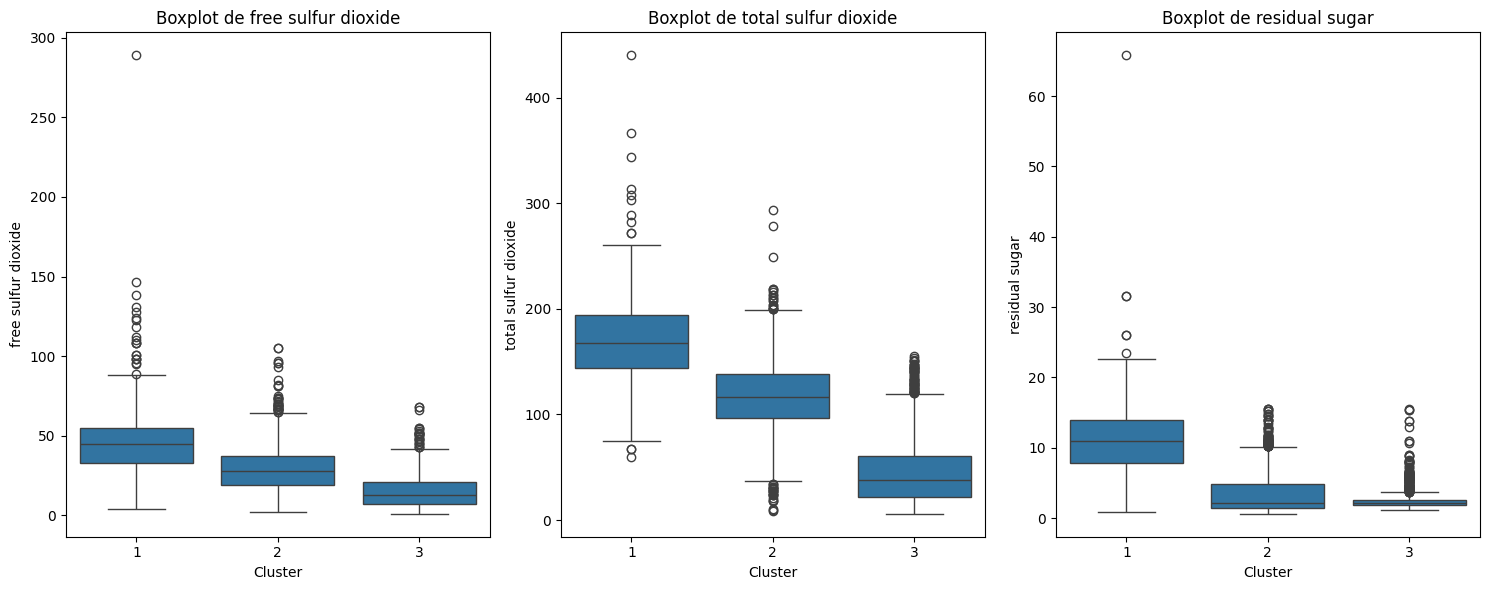

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y 'kmeans.labels_' contiene las etiquetas de los clusters
data['cluster'] = kmeans.labels_ + 1

# Especifica las columnas que deseas visualizar en los boxplots
columnas = ['free sulfur dioxide', 'total sulfur dioxide', 'residual sugar']  # Reemplaza 'columna2' y 'columna3' con tus nombres de columnas

# Crea subgráficos para los boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columnas), figsize=(15, 6))

# Itera sobre las columnas y crea un boxplot para cada una
for i, columna in enumerate(columnas):
    sns.boxplot(data=data, x='cluster', y=columna, ax=axes[i])
    axes[i].set_title('Boxplot de {}'.format(columna))
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

Estos gráficos muestran la diferencia entre las medias de cada una de las 3 variables mencionadas, para cada uno de los 3 clusters.

Se observa así que dichas variables tienen valores muy diferenciados en cada uno de los cluster, siendo el primer cluster el que contiene los vinos con valores altos de dioxido de azufre total , y parcial y de azucar. El segundo contiene los vinos con valores intermedios de estas tres características, y finalmente el tercer cluster, guarda los vinos con valores menores de ellas.

Concluimos de nuevos que los clusters vienen diferenciados fundamentalmente por estas tres propiedades de los vinos ( y no por la calidad).

> ## Ejercicio 4 (Agrupamiento)

### 1) **selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset**

Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes preguntas:



In [42]:
import numpy as np

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

# Calcular la distancia de cada punto de datos al centroide de su cluster
distances_to_centroids = np.linalg.norm(scaled_data - centroids[labels], axis=1)

# Obtener los índices de los 10 elementos más cercanos a cada centroide de cluster
indices_most_representative = []
for cluster_id in range(len(centroids)):
    indices_cluster = np.where(labels == cluster_id)[0]
    indices_sorted_by_distance = np.argsort(distances_to_centroids[indices_cluster])
    indices_most_representative.extend(indices_cluster[indices_sorted_by_distance][:10])

# Obtener los datos de los 10 elementos más representativos de cada cluster
Top10 = data.iloc[indices_most_representative]
print("Los 10 elementos más representativos de cada cluster:")
print(Top10)


Los 10 elementos más representativos de cada cluster:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4632            6.8             0.240         0.38             8.3      0.045   
3966            7.2             0.300         0.30             8.1      0.050   
4826            6.8             0.270         0.37             8.2      0.055   
6275            6.5             0.250         0.32             9.9      0.045   
5145            6.6             0.230         0.37             8.5      0.036   
5141            6.6             0.230         0.37             8.5      0.036   
4268            6.8             0.260         0.40             7.5      0.046   
1980            7.2             0.280         0.26            12.5      0.046   
5925            7.4             0.380         0.34             8.3      0.052   
5930            7.4             0.380         0.34             8.3      0.052   
4143            6.9             0.320         0.30     

> **¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster? (0,5
puntos)**

El criterio utilizado para seleccionar los ejemplos más representativos de cada clúster se basa en la distancia euclidiana entre cada punto y el centroide del clúster correspondiente. La distancia euclidiana es una medida de la "cercanía" entre dos puntos.

Para cada clúster, calculamos el centroide, que es el punto promedio de todos los puntos en el clúster. Luego, calculamos la distancia euclidiana entre cada punto del conjunto de datos y el centroide de su clúster. Ordenamos los puntos según su distancia al centroide y seleccionamos los 10 puntos con las distancias más cortas, ya que estos puntos estarán más cerca del centroide y, por lo tanto, son más representativos del clúster.

### 2) **Seleccionar un algoritmo de agrupamiento jerárquico**



> ##### Método de Clústering Jerárquico Aglomerativo.

El Método de Clústering Jerárquico Aglomerativo es una técnica de agrupamiento que comienza tratando cada punto de datos como un clúster individual y luego une gradualmente los clústeres más cercanos entre sí. Este proceso se repite hasta que todos los puntos están en un único clúster o se alcanza un criterio predefinido, como un número específico de clústeres o una distancia umbral. El resultado es un dendrograma que muestra la estructura jerárquica de los datos.





In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import numpy as np
import pandas as pd

# Configurar el modelo de clustering jerárquico aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

# Calcular la matriz de distancias entre los elementos más representativos de cada cluster
distances = pdist(Top10)
distance_matrix = squareform(distances)

# Ajustar el modelo a los datos
agg_clustering.fit(distance_matrix)

# Obtener las etiquetas de cluster asignadas por el clustering jerárquico aglomerativo
agg_labels = agg_clustering.labels_

cluster_centers = []

for cluster_id in np.unique(agg_labels):
    cluster_indices = np.where(agg_labels == cluster_id)[0]
    cluster_center = np.mean(Top10.iloc[cluster_indices], axis=0)
    cluster_centers.append(cluster_center)

# Convertir los centros de masa de nuevo a la escala original (desescalarlos) si es necesario

# Crear un DataFrame para mostrar los centroides (o centros de masa)
centroids_df = pd.DataFrame(cluster_centers, columns=Top10.columns)
print("Centroides de los 3 clusters:")
print(centroids_df)

Centroides de los 3 clusters:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       7.100000          0.335714     0.305714        3.150000   0.049000   
1       8.228571          0.547857     0.284286        2.171429   0.081857   
2       6.977778          0.285556     0.347778        8.688889   0.046444   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            26.000000            108.357143  0.993459  3.217143   0.516429   
1             9.428571             31.285714  0.997010  3.312857   0.602857   
2            46.111111            173.888889  0.996172  3.147778   0.502222   

    quality  wine type    alcohol   cluster  
0  6.000000   1.785714  10.664286  2.142857  
1  6.000000   1.000000  10.257143  3.000000  
2  5.666667   2.000000   9.288889  1.000000  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


### 3) **Generar y analizar el dendrograma resultante**

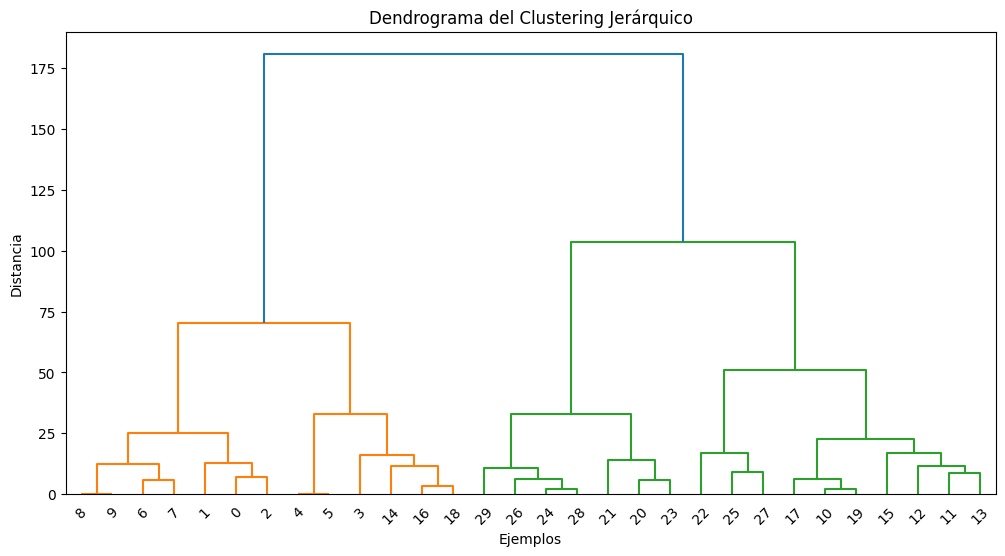

In [44]:
from scipy.cluster import hierarchy

# Calcular la matriz de enlace utilizando el método de enlace completo
matriz_enlace = hierarchy.complete(Top10)

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrograma = hierarchy.dendrogram(matriz_enlace)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Ejemplos')
plt.ylabel('Distancia')
plt.show()

Un dendrograma es una representación gráfica de los resultados de un análisis de clústeres jerárquico. Cada punto de datos se representa como una línea en la parte inferior del gráfico, y a medida que los clústeres se fusionan, estas líneas se combinan para formar ramas más grandes. La altura en la que se fusionan los clústeres representa la distancia entre ellos: clústeres fusionados a una altura baja son más similares entre sí que aquellos fusionados a una altura mayor.

Observando el dendograma podemos ver que antes de llegar a una distancia de 50, obtenemos 4 clústeres:
 * 1º: vemos que los vinos 0, 1, 2, 6, 7, 8, 9, son muy similares
 * 2º: vemos que los vinos 3, 4, 5, 14, 16, 18, son muy similares
 * 3º: vemos que los vinos 20, 21, 23, 24, 26, 28, 29, son muy similares
 * 4º: vemos que los vinos 10, 11, 12, 13, 15, 17, 19, son muy similares

No obstante, nosotros nos quedamos con 3 clústeres es decir, cortamos a una distancia de 75:
* 1º: vemos que los vinos 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 16, 18 son muy similares
* 2º: vemos que los vinos 20, 21, 23, 24, 26, 28, 29, son muy similares
* 3º: vemos que los vinos 10, 11, 12, 13, 15, 17, 19, son muy similares

**Clúster 1 - Frescura y Acidez:**

* Caracterizado por una alta acidez fija y volátil, junto con niveles moderados de pH.
* Predominan vinos con un contenido de azúcar residual moderado y un nivel de alcohol equilibrado.
* Se distingue por la presencia de compuestos fenólicos y sulfurosos, que contribuyen a una experiencia sensorial refrescante y compleja.

**Clúster 2 - Dulzura y Cuerpo:**

* Exhibe vinos con un mayor contenido de azúcar residual y un menor nivel de alcohol.
* La acidez puede ser más suave en comparación con otros clústeres.
* Los compuestos fenólicos y sulfurosos pueden ser menos prominentes, dando lugar a una experiencia más suave y redonda en boca.

**Clúster 3 - Intensidad y Complejidad:**

* Destaca por una amplia gama de características, desde alta acidez hasta un contenido de azúcar residual moderado.
* Puede incluir vinos de alta calidad, con una concentración notable de compuestos fenólicos y sulfurosos.
* La variedad de tipos de vino, como tinto y blanco, agrega una dimensión adicional a este clúster, ofreciendo una experiencia sensorial diversa y fascinante.